# 수치입력 수치 예측 모델 레시피
## 4. 깊은 다층퍼셉트론 신경망 모델

In [1]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 데이터셋 준비

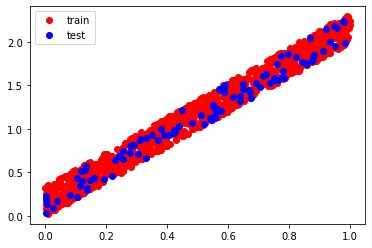

In [2]:
# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1))/3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1))/3.0

#데이터셋 확인
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### GPU 문제 해결 - Tensorflow Backend 엔진 설정

In [3]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
# config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

### 다층퍼셉트론 모델

In [4]:
# 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

W0904 18:06:05.233438  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 18:06:05.236439  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 18:06:05.240379  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
# 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

W0904 18:06:09.409997  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

W0904 18:06:10.921805  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0904 18:06:10.929244  1572 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
1000/1000 [==============================] - 1s 504us/step - loss: 0.8641
Epoch 2/50
1000/1000 [==============================] - 0s 41us/step - loss: 0.1883
Epoch 3/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0388
Epoch 4/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.0226
Epoch 5/50
1000/1000 [==============================] - 0s 41us/step - loss: 0.0140
Epoch 6/50
1000/1000 [==============================] - 0s 41us/step - loss: 0.0106
Epoch 7/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0105
Epoch 8/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0101
Epoch 9/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0102
Epoch 10/50
1000/1000 [==============================] - 0s 41us/step - loss: 0.0102
Epoch 11/50
1000/1000 [==============================] - 0s 39us/step - loss: 0.0102
Epoch 12/50
1000/1000 [==============================] - 0s 40us/step - l

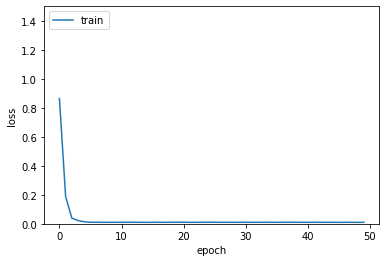

In [7]:
# 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 모델 평가하기

In [8]:
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 342us/step
loss : 0.009111100137233734
